# 0.기초 코드

코드 실행 후 런타임 - 런타임 다시 시작, 런타임 - 모두 실행

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose   

In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None) # 열이 다 보이게

import matplotlib.pyplot as plt # 시각화를 위해
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

from google.colab import drive # 구글 드라이브와 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.데이터 준비

In [3]:
data = pd.read_csv('/content/drive/MyDrive/KBO_Batter_OPS_Predict/kbo_OPS.csv')

## 1.1 데이터 확인

In [4]:
data.head()

,Unnamed: 0,선수,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,생일
0,0,이종범94해SS,124,561,499,113,196,27,5,19,290,77,84,15,51,6,14,31,2,1,4,0.393,0.452,0.581,1.033,0.462,198.3,11.77,1970-08-15
1,1,테임즈15N1B,142,595,472,130,180,42,5,47,373,140,40,8,103,13,11,91,7,0,7,0.381,0.498,0.790,1.288,0.530,222.3,10.71,1986-11-10
2,2,심정수03현RF,133,601,460,110,154,16,1,53,331,142,6,2,124,9,17,63,14,0,8,0.335,0.478,0.720,1.197,0.498,210.7,10.19,1975-05-05
3,3,이종범97해SS,125,577,484,112,157,28,3,30,281,74,64,15,87,3,30,49,9,0,3,0.324,0.428,0.581,1.009,0.431,173.2,9.70,1970-08-15
4,4,이종범96해SS,113,525,449,94,149,28,1,25,254,76,57,12,67,7,15,39,4,0,2,0.332,0.425,0.566,0.991,0.440,184.6,9.52,1970-08-15


## 1.2 columns - 설명

In [5]:
data.columns

Index(['Unnamed: 0', '선수', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타',
       '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율', '출루',
       '장타', 'OPS', 'wOBA', 'wRC+', 'WAR+', '생일'],
      dtype='object')

*   wOBA - 가중출루율
*   wRC+ - 조정 득점 창출력(타자의 득점 생산력)
*   WAR+ - 대체 선수 대비 승리 기여도

# 2.데이터 전처리

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9680 non-null   int64  
 1   선수          9680 non-null   object 
 2   G           9680 non-null   int64  
 3   타석          9680 non-null   int64  
 4   타수          9680 non-null   int64  
 5   득점          9680 non-null   int64  
 6   안타          9680 non-null   int64  
 7   2타          9680 non-null   int64  
 8   3타          9680 non-null   int64  
 9   홈런          9680 non-null   int64  
 10  루타          9680 non-null   int64  
 11  타점          9680 non-null   int64  
 12  도루          9680 non-null   int64  
 13  도실          9680 non-null   int64  
 14  볼넷          9680 non-null   int64  
 15  사구          9680 non-null   int64  
 16  고4          9680 non-null   int64  
 17  삼진          9680 non-null   int64  
 18  병살          9680 non-null   int64  
 19  희타          9680 non-null  

선수 column에 선수이름, 년도, 팀, 포지션이 들어가있어 나누어 주어야한다.

In [7]:
data.head()

,Unnamed: 0,선수,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,생일
0,0,이종범94해SS,124,561,499,113,196,27,5,19,290,77,84,15,51,6,14,31,2,1,4,0.393,0.452,0.581,1.033,0.462,198.3,11.77,1970-08-15
1,1,테임즈15N1B,142,595,472,130,180,42,5,47,373,140,40,8,103,13,11,91,7,0,7,0.381,0.498,0.790,1.288,0.530,222.3,10.71,1986-11-10
2,2,심정수03현RF,133,601,460,110,154,16,1,53,331,142,6,2,124,9,17,63,14,0,8,0.335,0.478,0.720,1.197,0.498,210.7,10.19,1975-05-05
3,3,이종범97해SS,125,577,484,112,157,28,3,30,281,74,64,15,87,3,30,49,9,0,3,0.324,0.428,0.581,1.009,0.431,173.2,9.70,1970-08-15
4,4,이종범96해SS,113,525,449,94,149,28,1,25,254,76,57,12,67,7,15,39,4,0,2,0.332,0.425,0.566,0.991,0.440,184.6,9.52,1970-08-15


In [8]:
data = data.drop('Unnamed: 0', axis = 1)

In [9]:
# 포지션 추가
position_check = ['C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF', 'DH', 'P']
position = []
player = []

for i in data['선수']:
  if i[-2:] in position_check:
    position.append(i[-2:])
    player.append(i[:-2])
  elif i[-1:] in position_check:
    position.append(i[-1:])
    player.append(i[:-1])
  else:
    position.append(np.nan)
    player.append(i)

data['포지션'] = position
data['선수'] = player

투수 데이터도 들어가 있어서 잘라주었다.

In [10]:
data = data[data['포지션'] != 'P']

In [11]:
# 팀 추가
team = []
player = []

for i in data['선수']:
  team.append(i[-1])
  player.append(i[:-1])

data['팀'] = team
data['선수'] = player

중간에 선수가 트레이드된 경우 팀이 2개가 들어가 있어 슬라이싱이 제대로 안 된 경우가 있었다.

In [12]:
# 선수별 연도 추가
year = []
player = []

for i in data['선수']:
  if i[-1] in team:
    if i[-3:-1] > '50':
      year.append(int('19' + i[-3:-1]))
      player.append(i[:-3])
    else:
      year.append(int('20' + i[-3:-1]))
      player.append(i[:-3])

  else:
    if i[-2:] > '50':
      year.append(int('19' + i[-2:]))
      player.append(i[:-2])
    else:
      year.append(int('20' + i[-2:]))
      player.append(i[:-2])

data['선수'] = player
data['연도'] = year

In [13]:
data.head()

,선수,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,생일,포지션,팀,연도
0,이종범,124,561,499,113,196,27,5,19,290,77,84,15,51,6,14,31,2,1,4,0.393,0.452,0.581,1.033,0.462,198.3,11.77,1970-08-15,SS,해,1994
1,테임즈,142,595,472,130,180,42,5,47,373,140,40,8,103,13,11,91,7,0,7,0.381,0.498,0.790,1.288,0.530,222.3,10.71,1986-11-10,1B,N,2015
2,심정수,133,601,460,110,154,16,1,53,331,142,6,2,124,9,17,63,14,0,8,0.335,0.478,0.720,1.197,0.498,210.7,10.19,1975-05-05,RF,현,2003
3,이종범,125,577,484,112,157,28,3,30,281,74,64,15,87,3,30,49,9,0,3,0.324,0.428,0.581,1.009,0.431,173.2,9.70,1970-08-15,SS,해,1997
4,이종범,113,525,449,94,149,28,1,25,254,76,57,12,67,7,15,39,4,0,2,0.332,0.425,0.566,0.991,0.440,184.6,9.52,1970-08-15,SS,해,1996


In [14]:
# 선수별 고유 아이디 부여
info = data[['선수', '생일']].apply(lambda x: tuple(x), axis=1)

player_id = {}
for i,j in enumerate(info.unique()):
    player_id[j] = i
    
data['ID'] = data.apply(lambda x: player_id[tuple([x['선수'], x['생일']])], axis=1)

In [15]:
columns = ['ID', '연도', '팀', '선수', '생일', '포지션'] + data.columns[2:-5].to_list()
data = data[columns]

In [16]:
data.head()

,ID,연도,팀,선수,생일,포지션,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+
0,0,1994,해,이종범,1970-08-15,SS,561,499,113,196,27,5,19,290,77,84,15,51,6,14,31,2,1,4,0.393,0.452,0.581,1.033,0.462,198.3,11.77
1,1,2015,N,테임즈,1986-11-10,1B,595,472,130,180,42,5,47,373,140,40,8,103,13,11,91,7,0,7,0.381,0.498,0.790,1.288,0.530,222.3,10.71
2,2,2003,현,심정수,1975-05-05,RF,601,460,110,154,16,1,53,331,142,6,2,124,9,17,63,14,0,8,0.335,0.478,0.720,1.197,0.498,210.7,10.19
3,0,1997,해,이종범,1970-08-15,SS,577,484,112,157,28,3,30,281,74,64,15,87,3,30,49,9,0,3,0.324,0.428,0.581,1.009,0.431,173.2,9.70
4,0,1996,해,이종범,1970-08-15,SS,525,449,94,149,28,1,25,254,76,57,12,67,7,15,39,4,0,2,0.332,0.425,0.566,0.991,0.440,184.6,9.52


데이터에 null 값이 있나 확인을 해보았다.

In [17]:
data.isnull().sum()

ID         0
연도         0
팀          0
선수         0
생일         0
포지션     1518
타석         0
타수         0
득점         0
안타         0
2타         0
3타         0
홈런         0
루타         0
타점         0
도루         0
도실         0
볼넷         0
사구         0
고4         0
삼진         0
병살         0
희타         0
희비         0
타율      1269
출루       859
장타      1269
OPS     1269
wOBA     747
wRC+    1291
WAR+       0
dtype: int64

OPS가 비어있는 선수들을 다시 확인을 해보았다.

In [18]:
data[data['OPS'].isnull()].head(1)

,ID,연도,팀,선수,생일,포지션,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+
4700,428,2015,넥,문우람,1992-03-08,RF,138,119,22,28,10,0,2,44,22,1,1,12,3,1,30,1,1,3,NaN,0.314,NaN,NaN,0.306,NaN,0.05


타율, 출루, 장타, OPS, 등등이 비어 있는데 이 지표들은 나머지 지표로 계산이 가능하기 떄문에 계산을 해주었다.

타율 : 안타 / 타수  
출루 : 안타 + 볼넷 + 사구 / 타수  
장타 : 안타 + 1 * 2타 + 2 * 3타 + 3 * 홈런 / 타수  
OPS :  출루 + 장타

In [19]:
data['타율'] = data['안타'] / data['타수']
data['출루'] = (data['안타'] + data['볼넷'] + data['사구']) / (data['타수'] + data['볼넷'] + data['사구'] + data['희타'] + data['희비'])
data['장타'] = (data['안타'] + data['2타'] + 2*(data['3타']) + 3* data['홈런']) / data['타수']
data['OPS'] = data['출루'] + data['장타']

In [20]:
data['타율'] = round(data['타율'],3)
data['출루'] = round(data['출루'],3)
data['장타'] = round(data['장타'],3)
data['OPS'] = round(data['OPS'],3)

In [21]:
data.isnull().sum()

ID         0
연도         0
팀          0
선수         0
생일         0
포지션     1518
타석         0
타수         0
득점         0
안타         0
2타         0
3타         0
홈런         0
루타         0
타점         0
도루         0
도실         0
볼넷         0
사구         0
고4         0
삼진         0
병살         0
희타         0
희비         0
타율       124
출루       110
장타       124
OPS      124
wOBA     747
wRC+    1291
WAR+       0
dtype: int64

아직도 null 값이 존재해서 다시 살펴봤더니 타수가 0인 선수들이 있었다.

In [22]:
data[data['타율'].isnull()]['타수'].value_counts()

0    124
Name: 타수, dtype: int64

In [23]:
data['타율'] = data['타율'].fillna(0)
data['출루'] = data['출루'].fillna(0)
data['장타'] = data['장타'].fillna(0)
data['OPS'] = data['OPS'].fillna(0)

In [24]:
data.isnull().sum()

ID         0
연도         0
팀          0
선수         0
생일         0
포지션     1518
타석         0
타수         0
득점         0
안타         0
2타         0
3타         0
홈런         0
루타         0
타점         0
도루         0
도실         0
볼넷         0
사구         0
고4         0
삼진         0
병살         0
희타         0
희비         0
타율         0
출루         0
장타         0
OPS        0
wOBA     747
wRC+    1291
WAR+       0
dtype: int64

# 3.EDA

## 3.1 Insight 도출

1.   OPS는 출루율과 장타율을 더한 기록이다.
2.   출루율은 (안타 개수 + 볼 넷 + 사구) / (타수 + 볼 넷 + 사구 + 희생플라이)
3.   장타율은 {단타 개수 + (2 x 2루타 개수) + (3 x 3루타 개수) + (4 x 홈런 개수)} / 타수
4.   볼 넷을 많이 얻을 수록 OPS가 높을 것이다.
5.   장타율에 2,3,4루타가 가중치가 붙으니 타구를 멀리 보낼 수록 OPS가 높을 것이다.
6.   내야수의 수비 스트레스가 외야수보다 크기 때문에 포지션 별로 OPS를 비교해봐야 할 것 같다.
7.   타수가 적으면 OPS를 정확하게 예측하기 힘들 것이다.

가장 먼저 상관관계를 보자면

In [25]:
data.corr()['OPS']

ID     -0.493252
연도      0.029004
타석      0.530090
타수      0.526342
득점      0.530430
안타      0.545307
2타      0.530729
3타      0.297005
홈런      0.486671
루타      0.558713
타점      0.543252
도루      0.257654
도실      0.301621
볼넷      0.519875
사구      0.395356
고4      0.334289
삼진      0.489964
병살      0.443311
희타      0.170607
희비      0.409248
타율      0.932200
출루      0.890180
장타      0.969436
OPS     1.000000
wOBA    0.982395
wRC+    0.984074
WAR+    0.522744
Name: OPS, dtype: float64

ID, 연도는 사실 상관이 없는 column이고, 타율, 출루, 장타, wOBA, wRC+가 강한 양의 상관관계가 있다는 것을 알 수 있다.

### 3.1.1 사사구

볼 넷의 상관계수가 생각보다 낮았다, 야구에서는 안타를 치지 않아도 출루를 할 수 있는 볼 넷, 고4를 더해서 사사구라는 새로운 변수를 만들어 보기로 했다.

In [26]:
data['사사구'] = data['볼넷'] + data['사구'] + data['고4']

In [27]:
data.corr()['OPS']['사사구']

0.5272096640351521

볼넷, 사구의 상관 계수보다는 높지만 크게 유의미하지는 않은 것 같아 그래프까지 그려보았다.

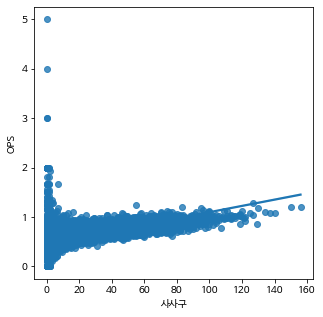

In [28]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot()

_ = sns.regplot(x = '사사구', y = 'OPS', data = data)

그래도 사사구가 늘어날 수록 OPS가 늘어나는 것을 확인 할 수 있었다.

### 3.1.2 장타

안타와 2루타, 3루타 홈런은 각각 1,2,3,4라는 가중치가 붙는다. 따라서 타구를 멀리 보낸다면 OPS가 높게 나올 것 같았다.

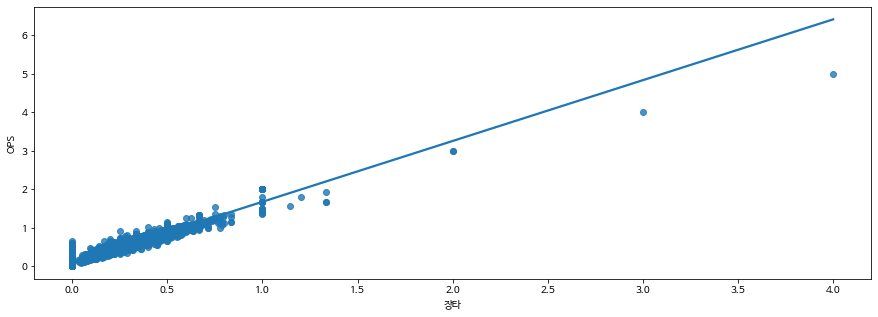

In [29]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot()

_ = sns.regplot(x = '장타', y = 'OPS', data = data, ci = None)

장타율이 높을 수록 OPS가 증가하는 경향이 있다는 것을 볼 수 있다.

### 3.1.3 포지션

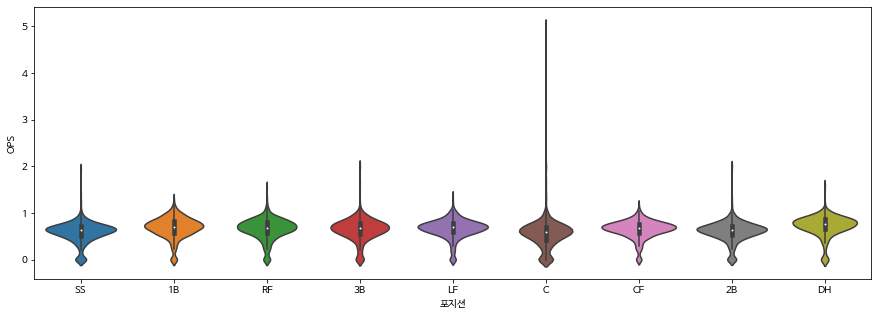

In [30]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot()

_ = sns.violinplot(x = '포지션', y = 'OPS', data = data, ci = None)

가장 수비 스트레스가 심한 포수가 다른 포지션에 비해서 평균 OPS가 약간 낮은 것을 알 수 있었다. 그리고 포수의 OPS에 이상치가 있다는 것을 확인 할 수 있었다.

In [31]:
data[data['포지션'] == 'C']['OPS'].mean()

0.5563945098039216

In [32]:
data[data['포지션'] == 'DH']['OPS'].mean()

0.7167971360381861

수비 스트레스가 없는 지명타자의 OPS 평균이 포수의 OPS 평균보다 0.16정도 큰 것을 알 수 있다.

### 3.1.4 타석

In [33]:
data[data['OPS'] == data['OPS'].max()]

,ID,연도,팀,선수,생일,포지션,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,사사구
4050,886,2006,현,허준,1981-07-20,C,1,1,1,1,0,0,1,4,1,0,0,0,0,0,0,0,0,0,1.0,1.0,4.0,5.0,2.184,1434.5,0.16,0


2006년에 1타석에 나와서 홈런을 기록한 허준선수가 OPS가 5이다. 2007년에도 이 선수의 OPS가 5 비슷하게 나온다고 보장을 할 수 있을까?, 절대로 그럴 수 없을 것이다. 왜냐면 타석이 적기 때문이다. 이처럼 나중에 모델을 학습시킬 때 타석에 가중치를 부여해야 할 것같다.

In [34]:
data[(data['선수'] == '허준') & (data['연도'] == 2007)]

,ID,연도,팀,선수,생일,포지션,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,사사구
4878,886,2007,현,허준,1981-07-20,C,42,39,2,9,2,0,0,11,4,0,0,1,1,0,10,2,1,0,0.231,0.262,0.282,0.544,0.257,NaN,0.02,2


실제로도 2007년에 허준선수는 0.54라는 낮은 수준의 OPS를 기록했다.

# 4.Feature Engineering

22년도 OPS를 예측하기 위해 20년도까지 데이터로 학습을 하고 21년도 OPS로 검증을 해봐야한다.

In [35]:
data.columns

Index(['ID', '연도', '팀', '선수', '생일', '포지션', '타석', '타수', '득점', '안타', '2타', '3타',
       '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비',
       '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC+', 'WAR+', '사사구'],
      dtype='object')

도루, 도실 등등을 빼고 훈련시켜보려고 한다.

In [36]:
features = ['타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '볼넷', '사구', '고4', '삼진', '병살', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC+', '사사구']

n년전 columns을 가져오는 코드이다.

In [37]:
def get_lag(player_id, year, lag, feature=features, df=data):
    try:
        data_lag = df[(df['ID']==player_id)&(df['연도'] == year-lag)][feature].values[0]
        data_lag = pd.Series(data_lag)
        
    except:
        data_lag = [np.nan for i in feature]
        data_lag = pd.Series(data_lag)
        
    return data_lag

In [38]:
features_lag1 = ['LAG1_' + i for i in features]
features_lag2 = ['LAG2_' + i for i in features]

data[features_lag1] = data.apply(lambda x: get_lag(x['ID'],x['연도'], lag=1), axis=1)
data[features_lag2] = data.apply(lambda x: get_lag(x['ID'],x['연도'], lag=2), axis=1)

In [39]:
def get_total(player_id, year, feature = features, df = data):
    try:
        result_cum = df[(df['ID']==player_id) & (df['연도'] < year)][feature]
        result_cum = round(result_cum.mean(),3)
        
    except:
        result_cum = [np.nan for i in feature]
        result_cum = pd.Series(result_cum)
    
    return result_cum

In [40]:
features_cum = ['Total_' + i for i in features]

In [41]:
data[features_cum] = data.apply(lambda x: get_total(x['ID'], x['연도']), axis=1)

In [42]:
data.head()

,ID,연도,팀,선수,생일,포지션,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,사사구,LAG1_타석,LAG1_타수,LAG1_득점,LAG1_안타,LAG1_2타,LAG1_3타,LAG1_홈런,LAG1_루타,LAG1_타점,LAG1_볼넷,LAG1_사구,LAG1_고4,LAG1_삼진,LAG1_병살,LAG1_희비,LAG1_타율,LAG1_출루,LAG1_장타,LAG1_OPS,LAG1_wOBA,LAG1_wRC+,LAG1_사사구,LAG2_타석,LAG2_타수,LAG2_득점,LAG2_안타,LAG2_2타,LAG2_3타,LAG2_홈런,LAG2_루타,LAG2_타점,LAG2_볼넷,LAG2_사구,LAG2_고4,LAG2_삼진,LAG2_병살,LAG2_희비,LAG2_타율,LAG2_출루,LAG2_장타,LAG2_OPS,LAG2_wOBA,LAG2_wRC+,LAG2_사사구,Total_타석,Total_타수,Total_득점,Total_안타,Total_2타,Total_3타,Total_홈런,Total_루타,Total_타점,Total_볼넷,Total_사구,Total_고4,Total_삼진,Total_병살,Total_희비,Total_타율,Total_출루,Total_장타,Total_OPS,Total_wOBA,Total_wRC+,Total_사사구
0,0,1994,해,이종범,1970-08-15,SS,561,499,113,196,27,5,19,290,77,84,15,51,6,14,31,2,1,4,0.393,0.451,0.581,1.032,0.462,198.3,11.77,71,525.0,475.0,85.0,133.0,16.0,4.0,16.0,205.0,53.0,32.0,6.0,2.0,35.0,11.0,4.0,0.280,0.326,0.432,0.757,0.350,127.4,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,525.000,475.000,85.000,133.000,16.000,4.000,16.000,205.000,53.000,32.0,6.000,2.000,35.000,11.000,4.000,0.280,0.326,0.432,0.757,0.350,127.40,40.000
1,1,2015,N,테임즈,1986-11-10,1B,595,472,130,180,42,5,47,373,140,40,8,103,13,11,91,7,0,7,0.381,0.497,0.790,1.288,0.530,222.3,10.71,127,514.0,443.0,95.0,152.0,30.0,6.0,37.0,305.0,121.0,58.0,7.0,5.0,99.0,6.0,6.0,0.343,0.422,0.688,1.111,0.464,168.3,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,514.000,443.000,95.000,152.000,30.000,6.000,37.000,305.000,121.000,58.0,7.000,5.000,99.000,6.000,6.000,0.343,0.422,0.688,1.111,0.464,168.30,70.000
2,2,2003,현,심정수,1975-05-05,RF,601,460,110,154,16,1,53,331,142,6,2,124,9,17,63,14,0,8,0.335,0.478,0.720,1.197,0.498,210.7,10.19,150,577.0,502.0,101.0,161.0,22.0,1.0,46.0,323.0,119.0,69.0,3.0,10.0,114.0,13.0,3.0,0.321,0.404,0.643,1.047,0.440,177.7,82.0,453.0,381.0,67.0,112.0,19.0,1.0,18.0,187.0,70.0,60.0,11.0,4.0,75.0,11.0,1.0,0.294,0.404,0.491,0.895,0.403,135.7,75.0,408.333,356.667,58.667,105.111,18.778,1.333,21.111,189.889,67.444,42.0,6.111,3.889,68.889,7.889,3.111,0.276,0.356,0.503,0.859,0.377,133.70,52.000
3,0,1997,해,이종범,1970-08-15,SS,577,484,112,157,28,3,30,281,74,64,15,87,3,30,49,9,0,3,0.324,0.428,0.581,1.009,0.431,173.2,9.70,120,525.0,449.0,94.0,149.0,28.0,1.0,25.0,254.0,76.0,67.0,7.0,15.0,39.0,4.0,2.0,0.332,0.425,0.566,0.990,0.440,184.6,89.0,272.0,239.0,51.0,78.0,10.0,2.0,16.0,140.0,35.0,28.0,2.0,4.0,20.0,5.0,3.0,0.326,0.397,0.586,0.983,0.432,181.9,34.0,470.750,415.500,85.750,139.000,20.250,3.000,19.000,222.250,60.250,44.5,5.250,8.750,31.250,5.500,3.250,0.333,0.400,0.541,0.941,0.421,173.05,58.500
4,0,1996,해,이종범,1970-08-15,SS,525,449,94,149,28,1,25,254,76,57,12,67,7,15,39,4,0,2,0.332,0.425,0.566,0.990,0.440,184.6,9.52,89,272.0,239.0,51.0,78.0,10.0,2.0,16.0,140.0,35.0,28.0,2.0,4.0,20.0,5.0,3.0,0.326,0.397,0.586,0.983,0.432,181.9,34.0,561.0,499.0,113.0,196.0,27.0,5.0,19.0,290.0,77.0,51.0,6.0,14.0,31.0,2.0,4.0,0.393,0.451,0.581,1.032,0.462,198.3,71.0,452.667,404.333,83.000,135.667,17.667,3.667,17.000,211.667,55.000,37.0,4.667,6.667,28.667,6.000,3.667,0.333,0.391,0.533,0.924,0.415,169.20,48.333


In [43]:
features = data.columns[32::]

In [44]:
train = data[data['연도'] >= 2020]
test = data[data['연도'] == 2021]

In [45]:
X_train = train[features]
y_train = train['OPS']

X_test = test[features]
y_test = test['OPS']

# 5.Modeling

## 5.1 모델 선택

In [46]:
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## 5.2 모델 학습

여러가지 모델을 학습한 후 RMSE를 이용하여 실제 값과 예측값의 오차가 가장 적은 모델을 선택해서 학습을 시키려고 하였다.

In [47]:
model_dic = {'xgb':XGBRegressor(n_estimators=110, learning_rate=0.05 ,max_depth=3, min_samples_split=400, random_state=22),
              'lgbm':LGBMRegressor(random_state=22),
              'rf':RandomForestRegressor(random_state=22)}

In [48]:
test_error = {}

for i in model_dic:
  weight = train['타수']
  model = model_dic[i]
  model.fit(X_train.fillna(-1), y_train, sample_weight = weight)
  pred = model.predict(X_test.fillna(-1))
  print(i + ' OK')
  
  test_error[i] = mean_squared_error(y_test, pred) ** 0.5

[01:43:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb OK
lgbm OK
rf OK


In [49]:
test_error

{'xgb': 0.24524585379265654,
 'lgbm': 0.22248022704616902,
 'rf': 0.17661352778158465}

Random Forest가 가장 낮게 나왔다.

In [50]:
model = RandomForestRegressor()
weight = train['타수']

model.fit(X_train.fillna(-1), y_train, sample_weight = weight)

pred = model.predict(X_test.fillna(-1))
real = y_test

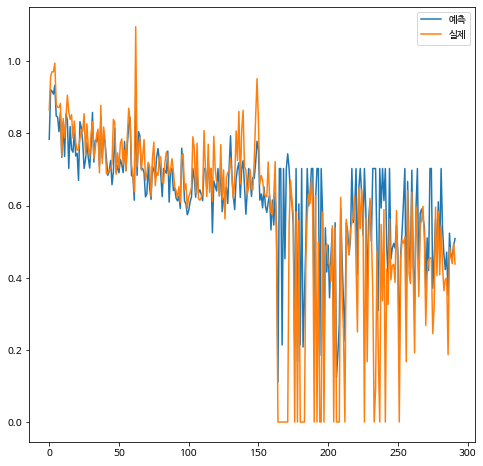

In [51]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

plt.plot(range(len(pred)), pred, label = '예측')
plt.plot(range(len(real)), real, label = '실제')
plt.legend()

In [52]:
test_error['rf']

0.17661352778158465

GridSearchCV를 통한 랜덤포레스트분류의 하이퍼 파라미터 튜닝

In [53]:
grid = {
      'n_estimators' : [100,200],
      'max_depth' : [6,8,10,12],
      'min_samples_leaf' : [8,12,18],
      'min_samples_split' : [8,16,20]
}

model = RandomForestRegressor(random_state = 22, n_jobs = -1)
model_grid_cv = GridSearchCV(model, param_grid = grid, cv = 2, n_jobs = -1, scoring = 'neg_root_mean_squared_error')
model_grid_cv.fit(X_train.fillna(-1),y_train)

print("최고의 파라미터 :", model_grid_cv.best_params_)
print("최고 평균 정확도 : {}".format(model_grid_cv.best_score_))

최고의 파라미터 : {'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 200}
최고 평균 정확도 : -0.3592317329032345


In [54]:
model = RandomForestRegressor(n_estimators = 200, max_depth = 10, min_samples_split = 20,  min_samples_leaf = 12, random_state = 22, n_jobs=-1)
model.fit(X_train.fillna(-1), y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=12, min_samples_split=20,
                      n_estimators=200, n_jobs=-1, random_state=22)

In [55]:
predict = model.predict(X_test.fillna(-1))
real = y_test

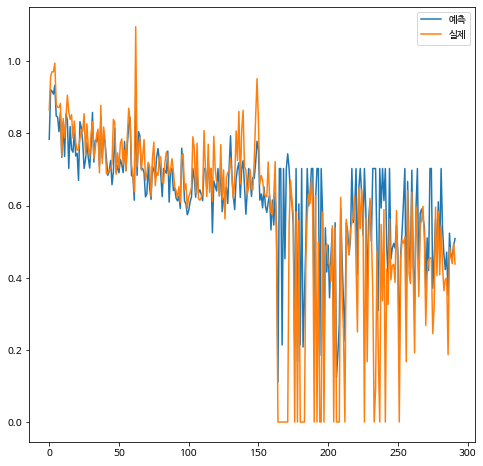

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

plt.plot(range(len(pred)), pred, label = '예측')
plt.plot(range(len(real)), real, label = '실제')
plt.legend()

In [57]:
  print(mean_squared_error(y_test, pred) ** 0.5)

0.1748205737652852


rmse가 약간 더 낮아진 것을 확인할 수 있다.

파라미터 중요도 시각화를 해보았다.

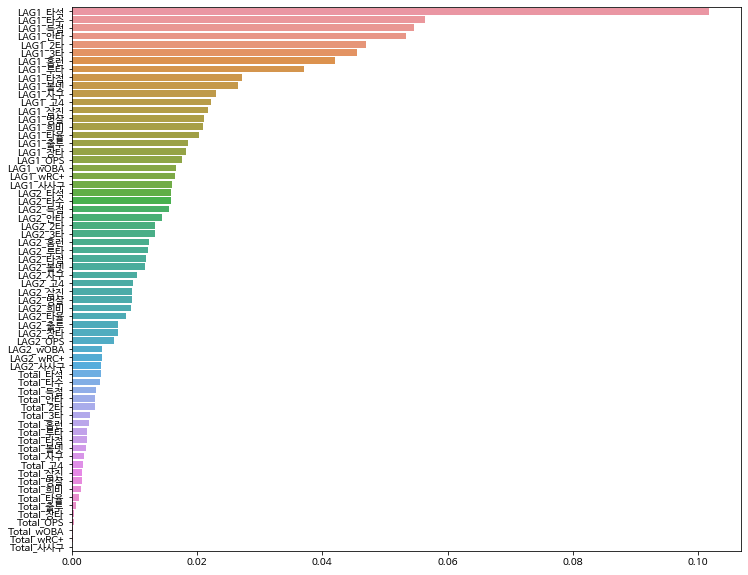

In [58]:
feature_importances = model.feature_importances_

ft_importances = pd.Series(feature_importances, index = X_train.columns)
ft_importances = ft_importances.sort_values(ascending=False)

plt.figure(figsize = (12,10))
sns.barplot(x=ft_importances, y= X_train.columns)
plt.show()

## 5.3 모델 예측

In [59]:
data_22 = pd.read_csv('/content/drive/MyDrive/KBO_Batter_OPS_Predict/kbo_OPS_22.csv')

In [60]:
data_22 = data_22[['선수', '생일']]

In [61]:
# 포지션 추가
position_check = ['C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF', 'DH', 'P']
position = []
player = []

for i in data_22['선수']:
  if i[-2:] in position_check:
    position.append(i[-2:])
    player.append(i[:-2])
  elif i[-1:] in position_check:
    position.append(i[-1:])
    player.append(i[:-1])
  else:
    position.append(np.nan)
    player.append(i)

data_22['포지션'] = position
data_22['선수'] = player

In [62]:
# 팀 추가
team = []
player = []

for i in data_22['선수']:
  team.append(i[-1])
  player.append(i[:-1])

data_22['팀'] = team
data_22['선수'] = player

In [63]:
# 선수별 연도 추가
year = []
player = []

for i in data_22['선수']:
  if i[-1] in team:
      year.append(int('20' + i[-3:-1]))
      player.append(i[:-3])

  else:
      year.append(int('20' + i[-2:]))
      player.append(i[:-2])

data_22['선수'] = player
data_22['연도'] = year

In [64]:
data_22 = data_22[data_22['포지션'] != 'P']

In [65]:
total_data = pd.concat([data, data_22])

In [66]:
total_data = total_data.drop('ID', axis = 1)

In [67]:
info_22 = total_data[['선수', '생일']].apply(lambda x: tuple(x), axis=1)

player_id_22 = {}
for i,j in enumerate(info_22.unique()):
  player_id_22[j] = i
    
total_data['ID'] = total_data.apply(lambda x: player_id_22[tuple([x['선수'], x['생일']])], axis=1)

In [68]:
total_data[features_lag1] = total_data.apply(lambda x: get_lag(x['ID'],x['연도'], lag=1), axis=1)

In [69]:
X = total_data[total_data['연도'] <= 2021][features]

In [70]:
y = total_data[total_data['연도'] <= 2021]['OPS']

In [71]:
model = RandomForestRegressor(n_estimators = 200, max_depth = 10, min_samples_split = 8,  min_samples_leaf = 12, random_state = 22, n_jobs=-1)
model.fit(X.fillna(-1), y)

RandomForestRegressor(max_depth=10, min_samples_leaf=12, min_samples_split=8,
                      n_estimators=200, n_jobs=-1, random_state=22)

In [72]:
X_2022 = total_data[total_data['연도'] == 2022][features]

In [73]:
data_22['OPS'] = model.predict(X_2022.fillna(-1))

In [75]:
data_22.to_csv('KBO_Batter_OPS_Predict.csv')